In [40]:
# Je commance par importer les librairies principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
%matplotlib inline
sns.set(style="whitegrid")
print("Succès")


Succès


Part1, Download the choosen dataset locally.

In [41]:
# Je vais impoter mon dataset et le vérifier
import pandas as pd
df = pd.read_csv("gapminder.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  142 non-null    int64  
 1   country     142 non-null    object 
 2   year        142 non-null    int64  
 3   population  142 non-null    int64  
 4   continent   142 non-null    object 
 5   life_exp    142 non-null    float64
 6   gdp_cap     142 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 7.9+ KB


,Unnamed: 0,year,population,life_exp,gdp_cap
count,142.000000,142.0,1.420000e+02,142.000000,142.000000
mean,857.000000,2007.0,4.402122e+07,67.007423,11680.071820
std,493.631441,0.0,1.476214e+08,12.073021,12859.937337
min,11.000000,2007.0,1.995790e+05,39.613000,277.551859
25%,434.000000,2007.0,4.508034e+06,57.160250,1624.842248
50%,857.000000,2007.0,1.051753e+07,71.935500,6124.371108
75%,1280.000000,2007.0,3.121004e+07,76.413250,18008.835640
max,1703.000000,2007.0,1.318683e+09,82.603000,49357.190170


Part 2, Apply various data handling and visualizations (chart types) on the dataset using matplotlib and seaborn.

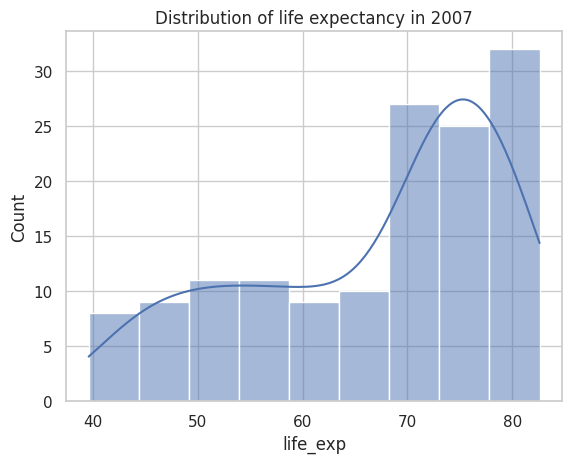

In [42]:
sns.histplot(df_2007["life_exp"], kde=True)
plt.title("Distribution of life expectancy in 2007")
plt.show()

This chart shows that the distrubution of life expectancy across countries in 2007. We can observe that the majority of countries have a life expectancy between 60 and 80 years.

Text(0, 0.5, 'Life Expectancy')

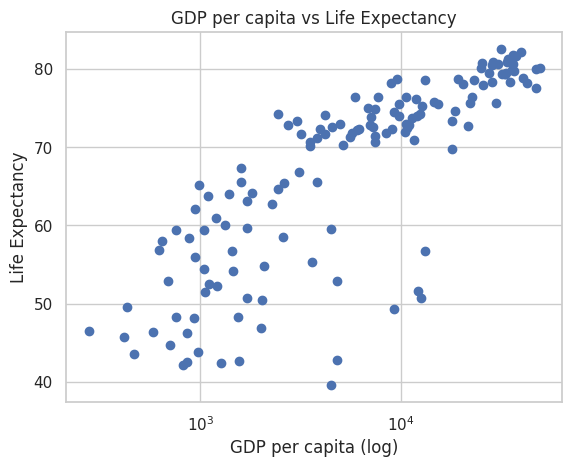

In [43]:
plt.scatter(df_2007["gdp_cap"], df_2007["life_exp"])
plt.xscale("log")
plt.title("GDP per capita vs Life Expectancy")
plt.xlabel("GDP per capita (log)")
plt.ylabel("Life Expectancy")

The scatter plot shows a positive relationship between GDP per capita and life expectancy. Richer countries tend to have higher life expectancy.

Text(0.5, 1.0, 'Life expectancy per continent')

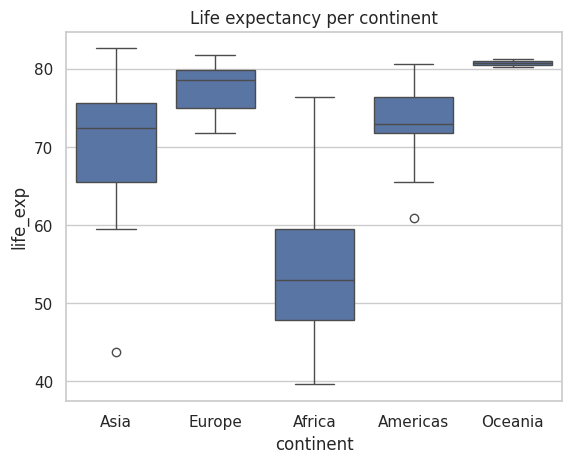

In [44]:
sns.boxplot(x="continent", y="life_exp", data=df_2007)
plt.title("Life expectancy per continent")


The boxplot compares life expectancy across continents. Europe and Oceania have higher median values, while Africa has a lower median and greater variability.

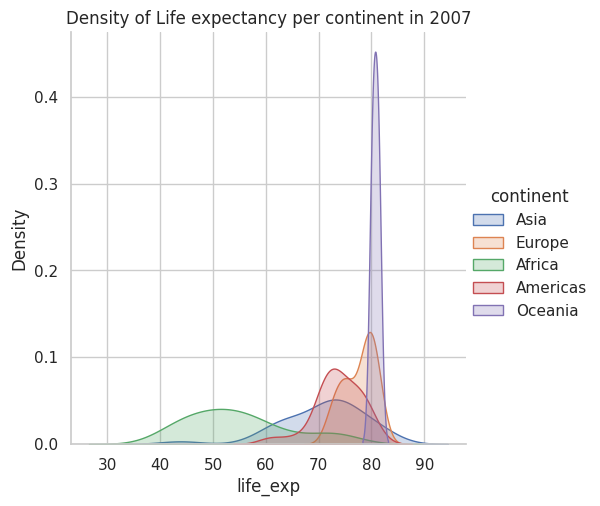

In [48]:
# FacetGrid kdeplot pour la variable 'life_exp', séparée par 'continent'
sns.FacetGrid(df_2007, hue="continent", height=5) \
   .map(sns.kdeplot, "life_exp", fill=True) \
   .add_legend()

plt.title("Density of Life expectancy per continent in 2007")
plt.show()


This plot shows the density of life expectancy by continent. Europe and Oceania have higher life expectancy, while Africa tends to have lower values.

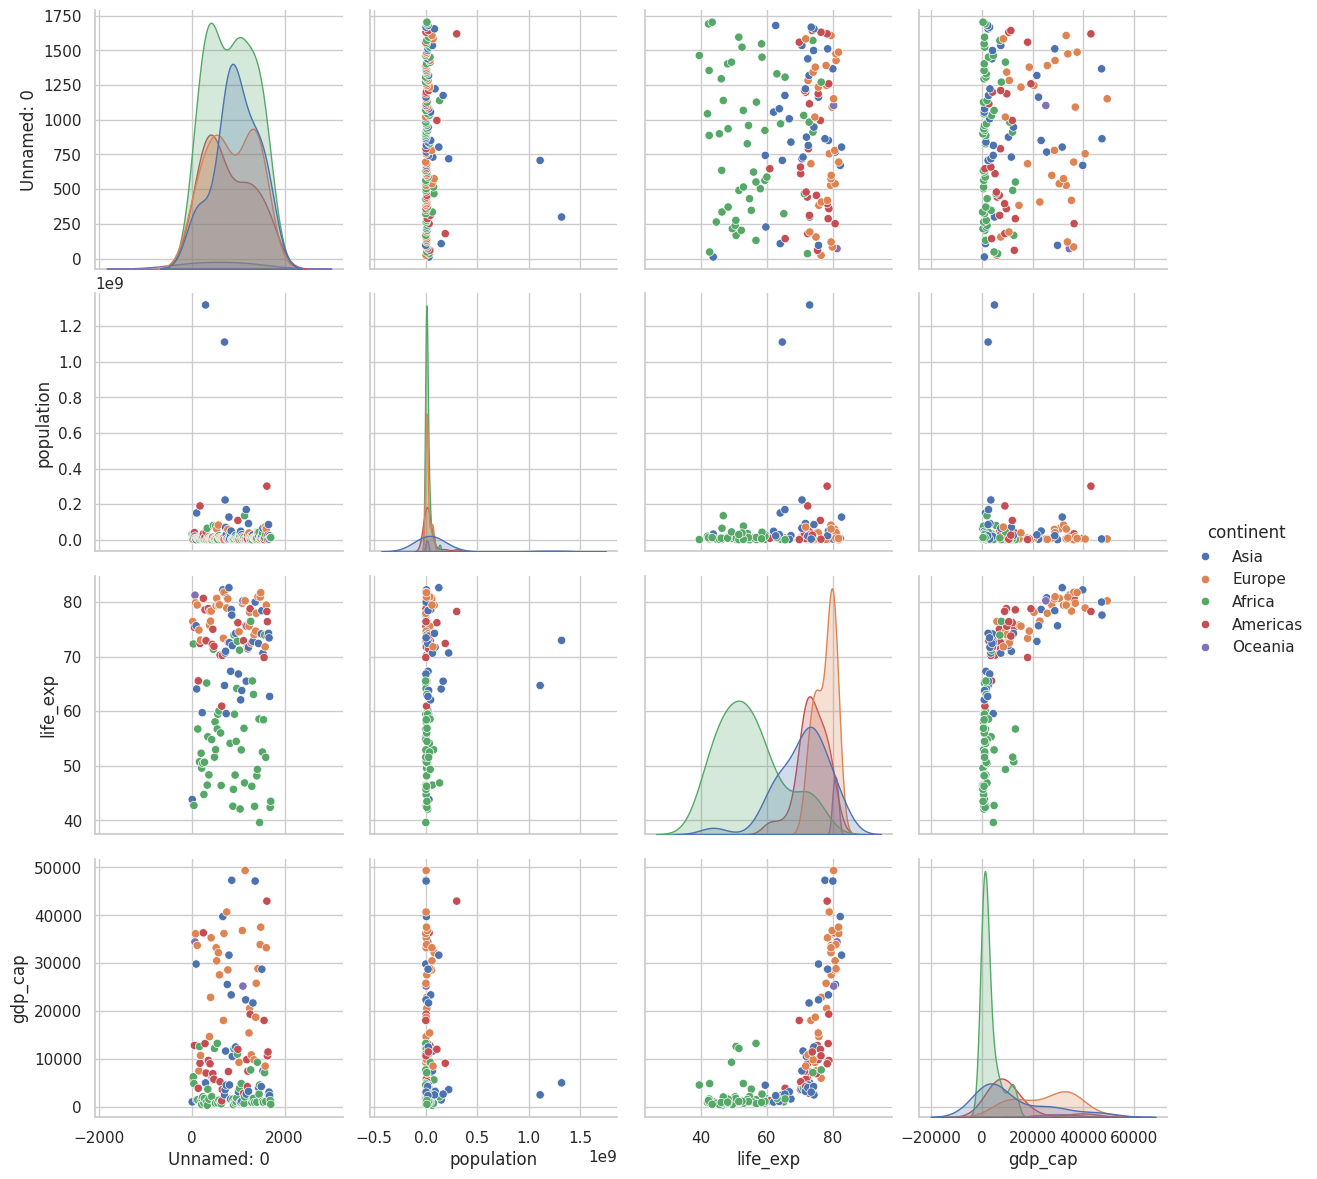

In [50]:
sns.pairplot(df.drop("year", axis=1), hue="continent", height=3)
plt.show()

The pairplot allows us to visually explore relationships between multiple numerical variables and detect trends or correlations by continent.

Part 3, This time we'll be using plotly for the same dataset

In [51]:
!pip install plotly
import plotly.express as px


In [52]:
fig = px.histogram(
    df,
    x="life_exp",
    nbins=20,
    title="Distribution of Life Expectancy",
    labels={"life_exp": "Life Expectancy"},
    color="continent"
)
fig.show()

In [53]:
fig = px.scatter(
    df,
    x="gdp_cap",
    y="life_exp",
    color="continent",
    size="population",
    hover_name="country",
    log_x=True,
    title="GDP per Capita vs Life Expectancy"
)
fig.show()

The scatter plot shows that countries with higher GDP per capita tend to have higher life expectancy. Bubble size represents population, and hover shows country names.

In [56]:
fig = px.box(
    df,
    x="continent",
    y="life_exp",
    color="continent",
    title="Life Expectancy per Continent"
)
fig.show()


The boxplot compares life expectancy across continents. Europe and Oceania have higher median values, while Africa has a lower median and greater variability. The interactive plot allows zooming to see individual data points.

In [57]:
fig = px.scatter_matrix(
    df,
    dimensions=["life_exp", "gdp_cap", "population"],
    color="continent",
    title="Scatter Matrix",
    hover_name="country"
)
fig.show()

Using Plotly for interactive visualizations provided additional insights. We can explore individual countries, zoom into regions, and better understand the relationship between GDP, population, and life expectancy across continents.

Part 4, Apply the same libraries on another dataset of your choice.

In [58]:
import pandas as pd

df_titanic = pd.read_csv("titanic.csv")
df_titanic.head()
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
import numpy as np

mean_age = np.mean(df_titanic['Age'])
mean_fare = np.mean(df_titanic['Fare'])
print("Mean Age:", mean_age)
print("Mean Fare:", mean_fare)

survival_by_class = df_titanic.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

# adding a new column : familysize
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch']

Mean Age: 29.69911764705882
Mean Fare: 32.204207968574636
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


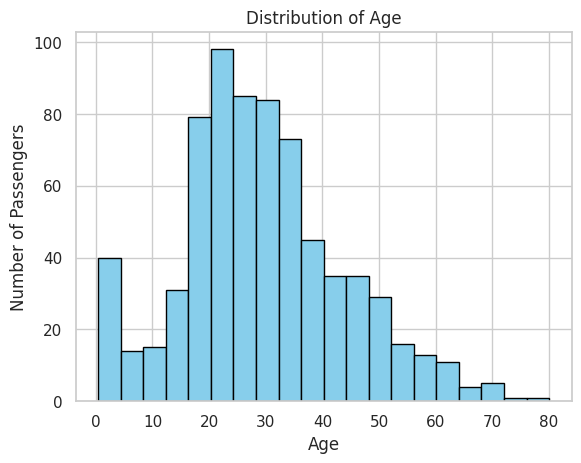

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_titanic['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

Most passengers are between 20 and 40 years old.

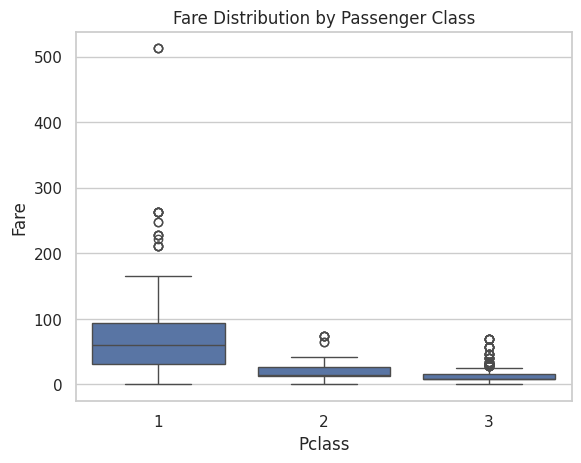

In [61]:
sns.boxplot(x='Pclass', y='Fare', data=df_titanic)
plt.title("Fare Distribution by Passenger Class")
plt.show()


As shown by the boxplot, the first-class passengers paid much higher fares than second and third class.

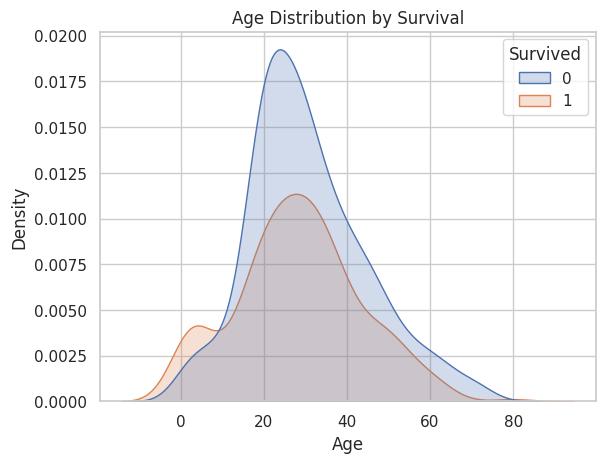

In [62]:
sns.kdeplot(data=df_titanic, x='Age', hue='Survived', fill=True)
plt.title("Age Distribution by Survival")
plt.show()

The KDE shows that survivors tended to be younger compared to non-survivors.

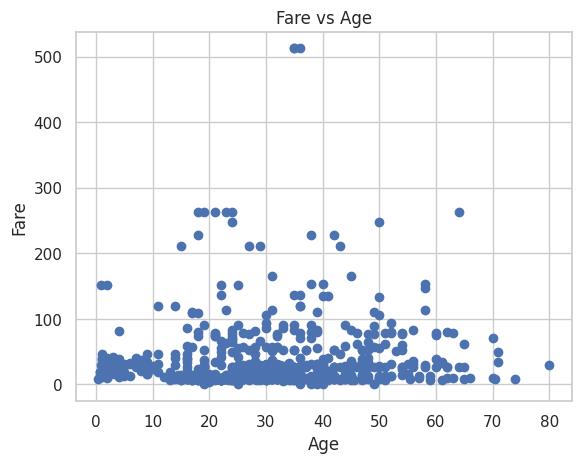

In [66]:
plt.scatter(df_titanic['Age'], df_titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs Age")
plt.show()

There is no strong correlation between age and fare, but very high fares appear for middle-aged passengers.

In [67]:
import plotly.express as px

fig = px.scatter(df_titanic, x='Age', y='Fare', color='Survived', hover_name='Name')
fig.show()

Interactive scatter plot allows exploration of Age vs Fare and shows which passengers survived.

